# Turkiyee Student Evaluation

## Description

 This data set contains a total 5820 evaluation scores provided by students from Gazi University in Ankara (Turkey). There is a total of 28 course specific questions and additional 5 attributes.
1.	instr: Instructor's identifier; values taken from {1,2,3}
2.	class: Course code (descriptor); values taken from {1-13}
3.	repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}
4.	attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}
5.	difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}
6.	Q1: The semester course content, teaching method and evaluation system were provided at the start.
7.	Q2: The course aims and objectives were clearly stated at the beginning of the period.
8.	Q3: The course was worth the amount of credit assigned to it.
9.	Q4: The course was taught according to the syllabus announced on the first day of class.
10.	Q5: The class discussions, homework assignments, applications and studies were satisfactory.
11.	Q6: The textbook and other courses resources were sufficient and up to date.
12.	Q7: The course allowed field work, applications, laboratory, discussion and other studies.
13.	Q8: The quizzes, assignments, projects and exams contributed to helping the learning.
14.	Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.
15.	Q10: My initial expectations about the course were met at the end of the period or year.
16.	Q11: The course was relevant and beneficial to my professional development.
17.	Q12: The course helped me look at life and the world with a new perspective.
18.	Q13: The Instructor's knowledge was relevant and up to date.
19.	Q14: The Instructor came prepared for classes.
20.	Q15: The Instructor taught in accordance with the announced lesson plan.
21.	Q16: The Instructor was committed to the course and was understandable.
22.	Q17: The Instructor arrived on time for classes.
23.	Q18: The Instructor has a smooth and easy to follow delivery/speech.
24.	Q19: The Instructor made effective use of class hours.
25.	Q20: The Instructor explained the course and was eager to be helpful to students.
26.	Q21: The Instructor demonstrated a positive approach to students.
27.	Q22: The Instructor was open and respectful of the views of students about the course.
28.	Q23: The Instructor encouraged participation in the course.
29.	Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.
30.	Q25: The Instructor responded to questions about the course inside and outside of the course.
31.	Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.
32.	Q27: The Instructor provided solutions to exams and discussed them with students.
33.	Q28: The Instructor treated all students in a right and objective manner.
34. Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}

## Task List

1. Convert Instructor and Course into Categorical
2. Split the dataset, instructor related question and course related question
3. Graph of the mean of score for different instructor/best course
4. Graph of the mean of score for different course/best course
5. Are the difference of instructor affect overall course score?
6. Are the difference of difficulty affect overall course score?

## Import the file and EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('turkiye-student-evaluation_generic.csv',header=0)

In [3]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df.shape

(5820, 33)

In [6]:
df.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [7]:
df['instr'].astype('category')

0       1
1       1
2       1
3       1
4       1
       ..
5815    3
5816    3
5817    3
5818    3
5819    3
Name: instr, Length: 5820, dtype: category
Categories (3, int64): [1, 2, 3]

In [8]:
df['class'].astype('category')

0        2
1        2
2        2
3        2
4        2
        ..
5815    13
5816    13
5817    13
5818    13
5819    13
Name: class, Length: 5820, dtype: category
Categories (13, int64): [1, 2, 3, 4, ..., 10, 11, 12, 13]

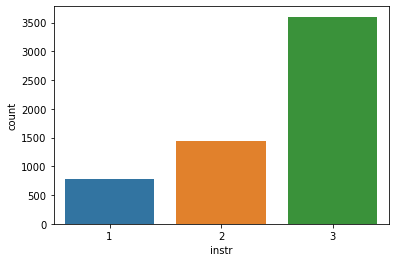

In [9]:
sns.countplot(df['instr'])

As you can see the graph above, instructor 3 has the most count followed by instructor 2 and 1.

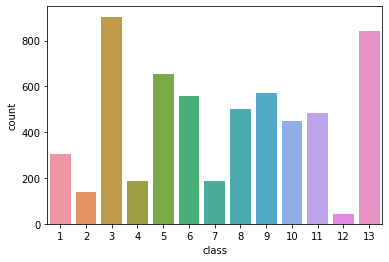

In [10]:
sns.countplot(df['class'])

As you can see above, most of the class is from class 3, followed by class 13.

## Split the dataset between Instructors and Classes

In [11]:
df.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

In [12]:
instr=df.drop(df.iloc[:, 1:17], axis=1)

In [13]:
instr.columns

Index(['instr', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

In [14]:
course=df.drop(df.iloc[:,17:],axis=1)

In [15]:
course.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1


In [16]:
course.drop(['instr','nb.repeat','attendance','difficulty'],axis=1,inplace=True)

In [17]:
course.head()

,class,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,2,3,3,3,3,3,3,3,3,3,3,3,3
1,2,3,3,3,3,3,3,3,3,3,3,3,3
2,2,5,5,5,5,5,5,5,5,5,5,5,5
3,2,3,3,3,3,3,3,3,3,3,3,3,3
4,2,1,1,1,1,1,1,1,1,1,1,1,1


## Instructor Data Analysis

In [18]:
instr.head()

,instr,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [19]:
instr_mean=instr.groupby('instr',as_index=False).mean()

In [20]:
instr_mean.head()

,instr,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,3.416774,3.456774,3.438710,3.369032,3.513548,3.449032,3.421935,3.393548,3.367742,3.387097,3.383226,3.403871,3.427097,3.370323,3.331613,3.405161
1,2,3.463989,3.484765,3.486842,3.429363,3.570637,3.529778,3.502770,3.490305,3.529778,3.538781,3.445291,3.388504,3.493767,3.443906,3.367729,3.506233
2,3,3.116634,3.177451,3.174674,3.022494,3.304638,3.050542,3.130519,3.179950,3.205221,3.213829,3.065260,3.026937,3.215218,3.101361,3.031380,3.207720


In [21]:
instr_mean_melt=instr_mean.melt(id_vars=['instr'],var_name='question',value_name='mean')

In [22]:
instr_mean_melt.head()

,instr,question,mean
0,1,Q13,3.416774
1,2,Q13,3.463989
2,3,Q13,3.116634
3,1,Q14,3.456774
4,2,Q14,3.484765


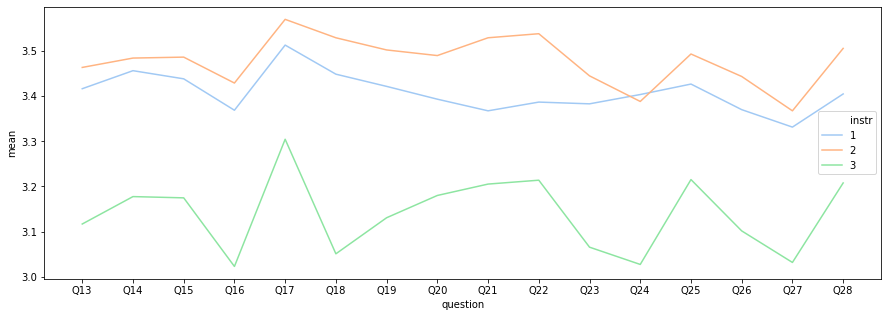

In [23]:
plt.figure(figsize=(15,5))
sns.lineplot(data=instr_mean_melt,x='question',y='mean',hue='instr',palette='pastel')

As you can see from the graph above, overall instructor 2 has the highest score, followed by instructor 1 and instructor 3.

## Classes Data Analysis

In [24]:
course.head()

,class,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,2,3,3,3,3,3,3,3,3,3,3,3,3
1,2,3,3,3,3,3,3,3,3,3,3,3,3
2,2,5,5,5,5,5,5,5,5,5,5,5,5
3,2,3,3,3,3,3,3,3,3,3,3,3,3
4,2,1,1,1,1,1,1,1,1,1,1,1,1


In [25]:
course_mean=course.groupby('class',as_index=False).mean()

In [26]:
course_mean.head()

,class,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,1,3.171617,3.363036,3.399340,3.330033,3.356436,3.316832,3.339934,3.257426,3.445545,3.382838,3.498350,3.389439
1,2,3.421429,3.492857,3.485714,3.457143,3.607143,3.542857,3.557143,3.600000,3.564286,3.564286,3.585714,3.521429
2,3,2.828540,2.911504,2.994469,2.933628,2.936947,2.940265,2.926991,2.908186,2.942478,2.910398,2.910398,2.893805
3,4,2.433155,2.631016,2.887701,2.631016,2.743316,2.780749,2.737968,2.711230,3.090909,2.786096,2.941176,2.737968
4,5,3.030488,3.146341,3.120427,3.179878,3.181402,3.221037,3.092988,3.048780,3.120427,3.094512,3.048780,2.986280


In [27]:
course_mean_melt=course_mean.melt(id_vars=['class'],var_name='question',value_name='mean')

In [28]:
course_mean_melt.head()

,class,question,mean
0,1,Q1,3.171617
1,2,Q1,3.421429
2,3,Q1,2.828540
3,4,Q1,2.433155
4,5,Q1,3.030488


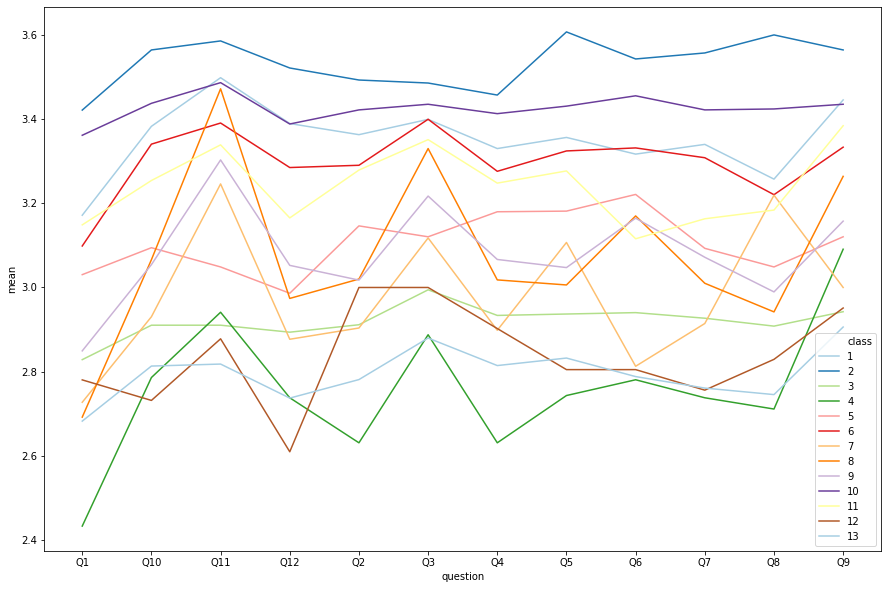

In [29]:
plt.figure(figsize=(15,10))
sns.lineplot(data=course_mean_melt,x='question',y='mean',hue='class',palette='Paired')

As you can see from the graph above, class 2 is the highest score by overall mean.

## Are different instructors affecting the result?

In [30]:
course['instr']=df['instr']

In [31]:
course.head()

,class,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,instr
0,2,3,3,3,3,3,3,3,3,3,3,3,3,1
1,2,3,3,3,3,3,3,3,3,3,3,3,3,1
2,2,5,5,5,5,5,5,5,5,5,5,5,5,1
3,2,3,3,3,3,3,3,3,3,3,3,3,3,1
4,2,1,1,1,1,1,1,1,1,1,1,1,1,1


In [32]:
course_instr=course.drop('class',axis=1)

In [33]:
course_instr.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,instr
0,3,3,3,3,3,3,3,3,3,3,3,3,1
1,3,3,3,3,3,3,3,3,3,3,3,3,1
2,5,5,5,5,5,5,5,5,5,5,5,5,1
3,3,3,3,3,3,3,3,3,3,3,3,3,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1


In [34]:
course_instr_mean=course_instr.groupby('instr',as_index=False).mean()

In [35]:
course_instr_mean.head()

,instr,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,1,3.219355,3.309677,3.367742,3.296774,3.384516,3.316129,3.323871,3.406452,3.353548,3.338065,3.446452,3.289032
1,2,3.119806,3.293629,3.371191,3.273546,3.308864,3.247922,3.250693,3.208449,3.375346,3.305402,3.387812,3.243767
2,3,2.791447,2.935018,3.060816,2.959733,2.964454,3.006109,2.936962,2.896695,3.041655,2.951402,3.045543,2.897528


In [36]:
course_instr_mean_melt=course_instr_mean.melt(id_vars=['instr'],var_name='question',value_name='mean')

In [37]:
course_instr_mean_melt.head()

,instr,question,mean
0,1,Q1,3.219355
1,2,Q1,3.119806
2,3,Q1,2.791447
3,1,Q2,3.309677
4,2,Q2,3.293629


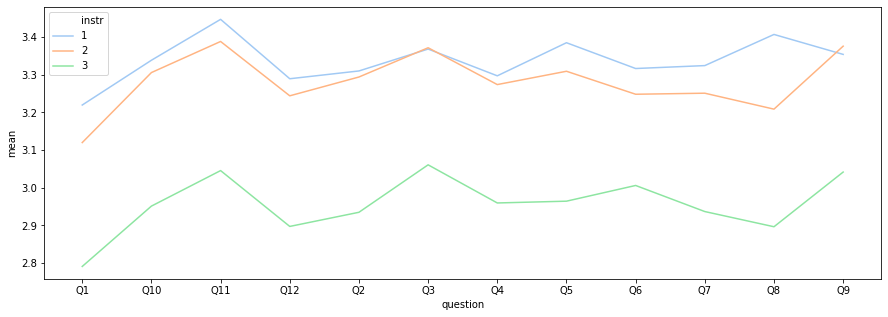

In [38]:
plt.figure(figsize=(15,5))
sns.lineplot(data=course_instr_mean_melt,x='question',y='mean',hue='instr',palette='pastel')

As you can see from the graph above, different instructors did affect the overall course score evaluation.

## Are the difference of difficulty affect overall course score?

In [39]:
course['difficulty']=df['difficulty']

In [40]:
course.head()

,class,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,instr,difficulty
0,2,3,3,3,3,3,3,3,3,3,3,3,3,1,4
1,2,3,3,3,3,3,3,3,3,3,3,3,3,1,3
2,2,5,5,5,5,5,5,5,5,5,5,5,5,1,4
3,2,3,3,3,3,3,3,3,3,3,3,3,3,1,3
4,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [41]:
course_diff=course.drop(['class','instr'],axis=1)

In [42]:
course_diff.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,difficulty
0,3,3,3,3,3,3,3,3,3,3,3,3,4
1,3,3,3,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,5,5,4
3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1


In [43]:
course_diff_mean=course_diff.groupby('difficulty',as_index=False).mean()

In [44]:
course_diff_mean.head()

,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,1,2.724691,2.796914,2.862963,2.822222,2.829012,2.850000,2.824691,2.813580,2.889506,2.832716,2.882099,2.813580
1,2,2.894353,3.092896,3.282332,3.111111,3.143898,3.136612,3.087432,3.043716,3.253188,3.183971,3.284153,3.091075
2,3,3.131905,3.339910,3.456595,3.318489,3.358512,3.373732,3.313980,3.266065,3.434047,3.360767,3.481398,3.276212
3,4,3.030204,3.207347,3.330612,3.225306,3.261224,3.225306,3.188571,3.173061,3.287347,3.197551,3.293878,3.133878
4,5,2.731595,2.771472,2.834356,2.794479,2.782209,2.776074,2.745399,2.751534,2.822086,2.717791,2.832822,2.700920


In [45]:
course_diff_mean_melt=course_diff_mean.melt(id_vars=['difficulty'],var_name='question',value_name='mean')

In [46]:
course_diff_mean_melt.head()

,difficulty,question,mean
0,1,Q1,2.724691
1,2,Q1,2.894353
2,3,Q1,3.131905
3,4,Q1,3.030204
4,5,Q1,2.731595


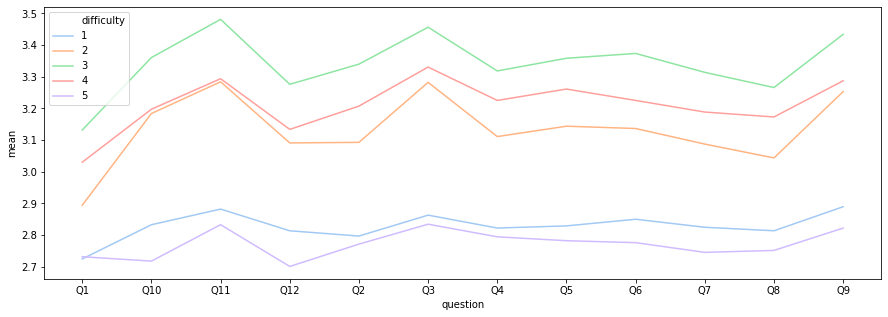

In [47]:
plt.figure(figsize=(15,5))
sns.lineplot(data=course_diff_mean_melt,x='question',y='mean',hue='difficulty',palette='pastel')

As you can see from the graph above, the easiest and hardest difficulty tend to be lower scored compared to the middle difficulty (2,3,4).

## Correlation between non scored variable

In [48]:
df_non=df.iloc[:,0:5]

In [49]:
df_non.head()

,instr,class,nb.repeat,attendance,difficulty
0,1,2,1,0,4
1,1,2,1,1,3
2,1,2,1,2,4
3,1,2,1,1,3
4,1,2,1,0,1


In [50]:
df_non.corr()

,instr,class,nb.repeat,attendance,difficulty
instr,1.000000,-0.039871,0.112763,-0.107231,-0.058368
class,-0.039871,1.000000,0.091527,-0.016312,-0.044899
nb.repeat,0.112763,0.091527,1.000000,-0.078086,0.110493
attendance,-0.107231,-0.016312,-0.078086,1.000000,0.436792
difficulty,-0.058368,-0.044899,0.110493,0.436792,1.000000


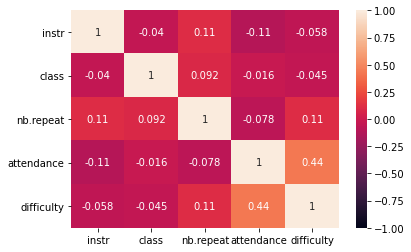

In [51]:
sns.heatmap(df_non.corr(), vmin=-1, vmax=1, annot=True)

As you can see above there's no strong correlation between non scored variable, except a little bit correlation between attendance and difficulty

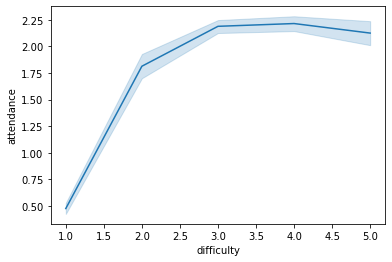

In [52]:
sns.lineplot(x='difficulty',y='attendance',data=df_non)